# Fetal Health Classification using AI/ML E-13

### Importing inital libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import joblib
import seaborn as sns

#library for data preprocessing & to read CSV files
import pandas as pd

# used for linear algebra and multi-dimensional matrix manipulation
import numpy as np 

import os

#used for data visualisation
import matplotlib.pyplot as plt

#matplotlib is used internally, easier to use
import seaborn as sb

### Loading and viewing the dataset

In [2]:
data_frame = pd.read_csv("./fetal_health.csv")
data_frame.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# About the data

This dataset records of features extracted from Cardiotocogram (**CTG**) exams, which were then classified by expert *obstetrician* into 3 classes: 
- **Normal**
- **Suspect**
- **Pathological**
---
The Dataset has the following features/attributes:

- **baseline value**: Baseline Fetal Heart Rate (FHR) (beats per minute)
- **accelerations**: Number of accelerations per second
- **fetal_movement**: Number of fetal movements per second
- **uterine_contractions**: Number of uterine contractions per second
- **light_decelerations**: Number of light decelerations (LDs) per second
- **severe_decelerations**: Number of severe decelerations (SDs) per second
- **prolongued_decelerations**: Number of prolonged decelerations (PDs) per second
- **abnormal_short_term_variability**: Percentage of time with abnormal short term variability
- **mean_value_of_short_term_variability**: Mean value of short term variability
- **percentage_of_time_with_abnormal_long_term_variability**: Percentage of time with abnormal long term variability
- **mean_value_of_long_term_variability**: Mean value of long term variability
- **histogram_width**: Width of histogram made using all values from a record
- **histogram_min**: Histogram minimum value
- **histogram_max**: Histogram maximum value
- **histogram_number_of_peaks**: Number of peaks in the exam histogram
- **histogram_number_of_zeroes**: Number of zeros in the exam histogram
- **histogram_mode**: Histogram mode
- **histogram_mean**: Histogram mean
- **histogram_median**: Histogram median
- **histogram_variance**: Histogram variance
- **histogram_tendency**: Histogram tendency
- **fetal_health**: Encoded as 1-Normal; 2-Suspect; 3-Pathological.

### Retreiving information of the dataset 

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## DATA ANALYISIS & PRE-PROCESSING 

### Statistical trends in the data

In [4]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Evaluating if our data is imbalanaced or not by analysing the target output.

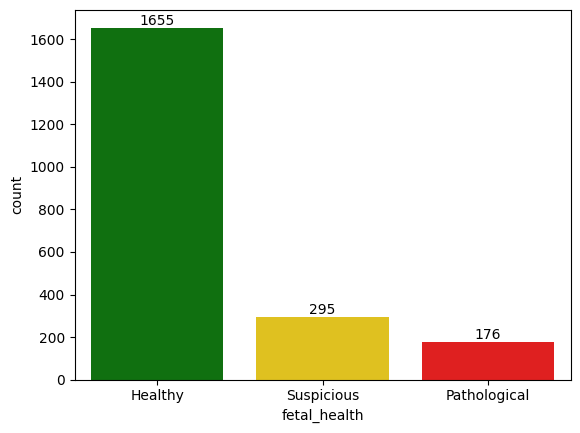

In [5]:
colours=["green","gold", "red"]
plot = sb.countplot(data=data_frame, x="fetal_health",palette=colours)
plot.bar_label(plot.containers[0])
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("Data Distribution")

#### We can see there is an imbalance in the data.

### A Heatmap to analyze how related any two datapoints are (Co-relation Matrix)

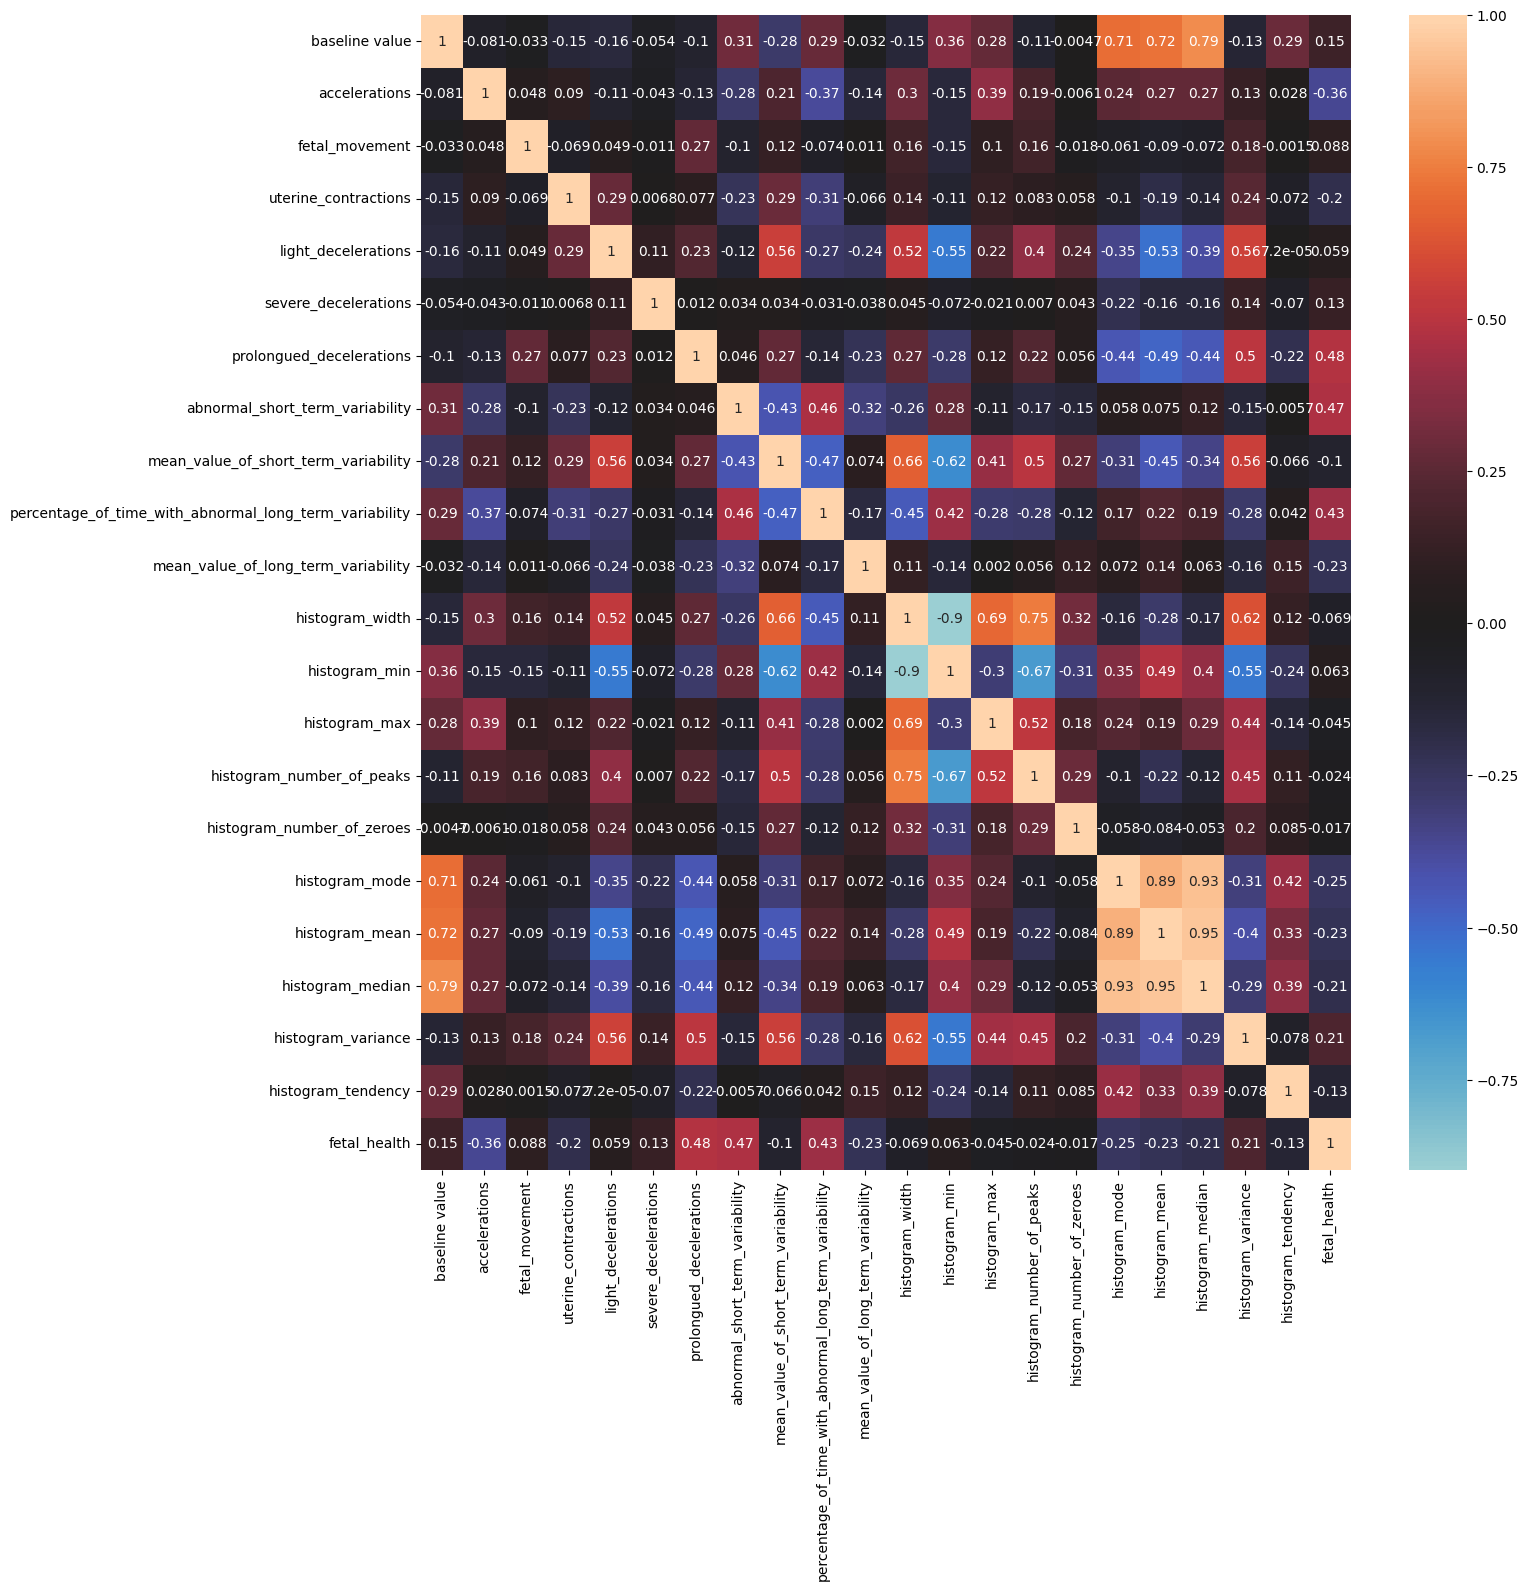

In [6]:
correlation_matrix = data_frame.corr()
plt.figure(figsize=(15,15))
sb.heatmap(correlation_matrix, annot=True,center=0)
plt.savefig("co-relation-matrix")

Based on the co-relation matrix we can see that
1. prolonged_decelerations
2. percentage of time with abnormal long term variabilty
3. mean value of long term variability

have higher co-relation with fetal health and hence these are the most important features that wil be essential in the prediction of the state of the fetus

In [7]:
# cols=['baseline value', 'accelerations', 'fetal_movement',
#        'uterine_contractions', 'light_decelerations', 'severe_decelerations',
#        'prolongued_decelerations', 'abnormal_short_term_variability',
#        'mean_value_of_short_term_variability',
#        'percentage_of_time_with_abnormal_long_term_variability',
#        'mean_value_of_long_term_variability']
# for i in cols:
#     sb.swarmplot(x=data_frame["fetal_health"], y=data_frame[i], color="black", alpha=0.5,size=1.5)
#     sb.boxenplot(x=data_frame["fetal_health"], y=data_frame[i], palette=colours)
#     plt.show()

In [8]:
# remove the target data from the dataset to visualise the the distribution of the attributtes
XData =data_frame.drop(["fetal_health"], axis=1)
# store the target data for future reference
YData = data_frame["fetal_health"]

### Visualise the distribution of data BEFORE feature scaling

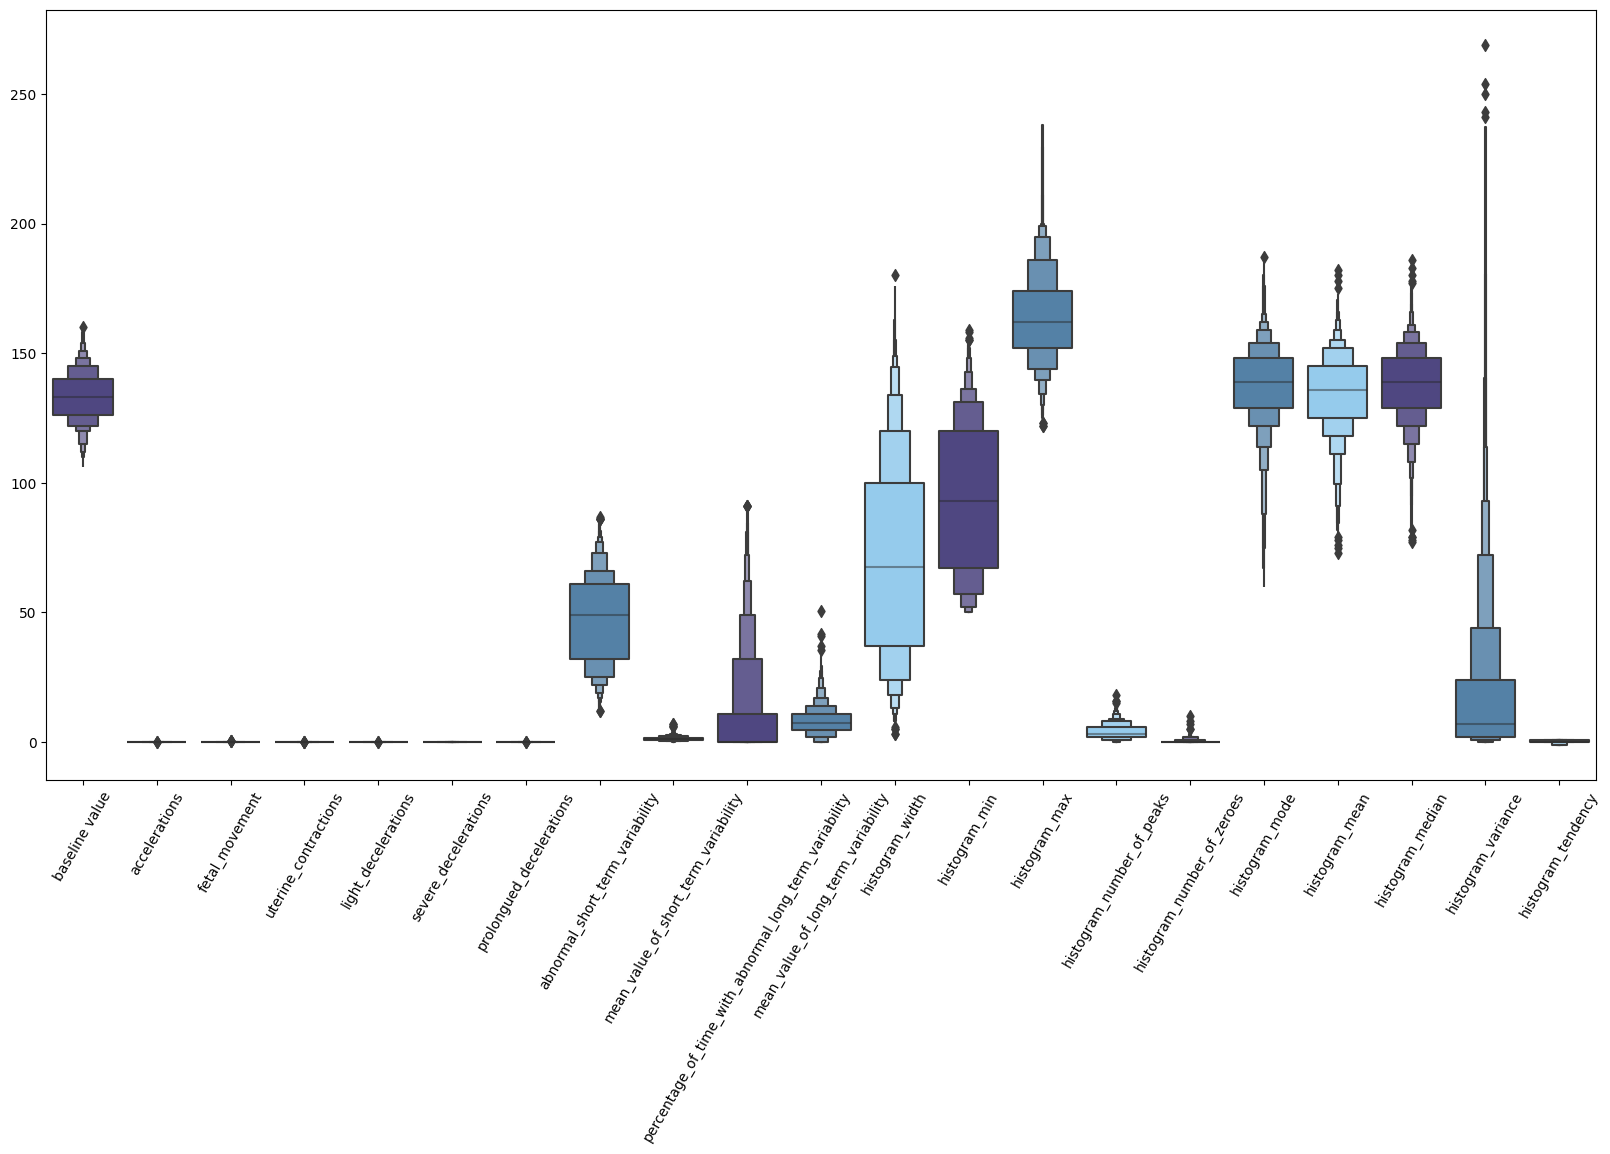

In [9]:
colors=["#483D8B","#4682B4", "#87CEFA"]
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
             'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']
plt.figure(figsize=(20,10))
sb.boxenplot(data = XData,palette = colors)
plt.xticks(rotation=60)
plt.show()

### Visualise the distribution of data AFTER feature scaling

Import the standard scaler from the scikit-learn library to scale the data/features to make the data suitable for model training

In [10]:
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
attributes = list(XData.columns)
s_scaler = StandardScaler()
XData_scaled= s_scaler.fit_transform(XData)
XData_scaled = pd.DataFrame(XData_scaled, columns=attributes)   
XData_scaled.describe().T
# Data after feature scaling


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


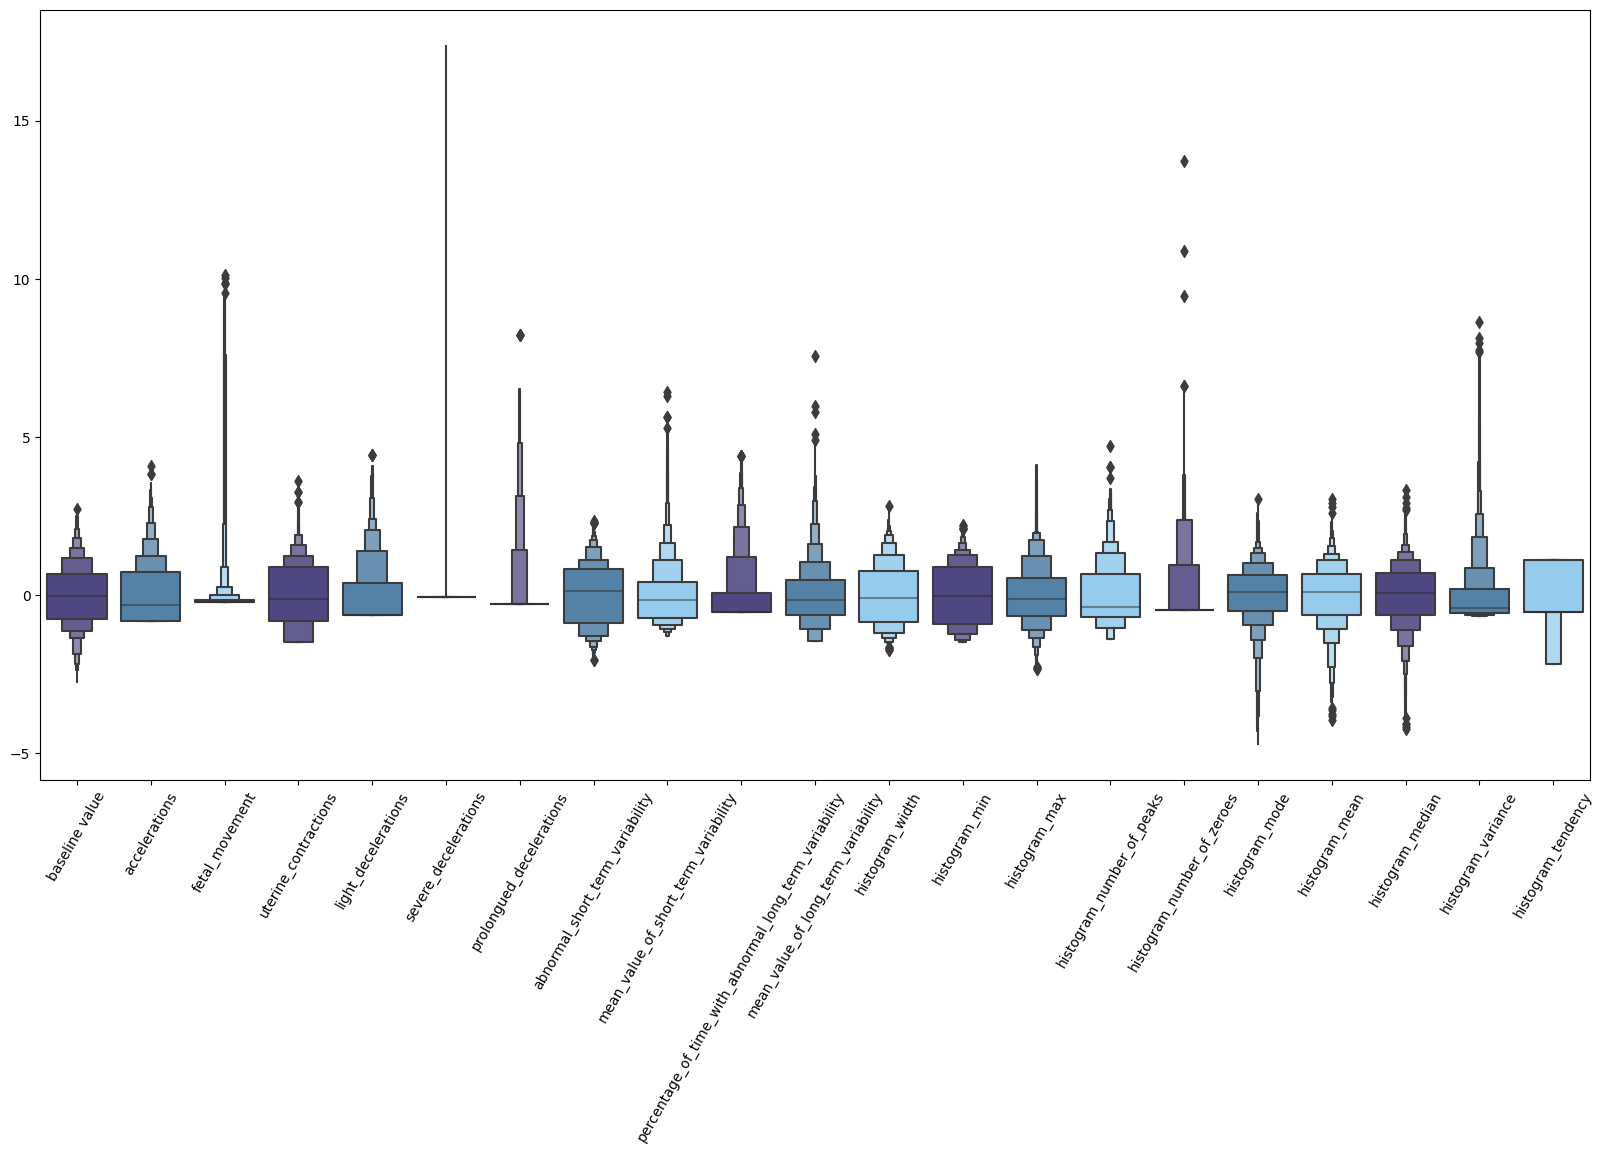

In [11]:
plt.figure(figsize=(20,10))
sb.boxenplot(data = XData_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

### Key Points
1. We can see from the above plot that the data is in the same range after the feature scaling
2. We can see some outliers in some attributes after the feature scaling
3. These outliers are not data entry errors or measurement errors as this data has been extracted from **CTG** data
4. Hence the outliers cannot be eliminated or dropped of from the model training as this will result in loss of information, and overfitting of the model (*fits exactly against training data.*)

## Model Building (YTBD)


### Splitting the data into train and test datasets (yet to be done) - First Review

In [12]:
from sklearn.model_selection import train_test_split
XDataTrain, XDataTest, YTrain,YTest = train_test_split(XData,YData,test_size=0.3,stratify=YData)

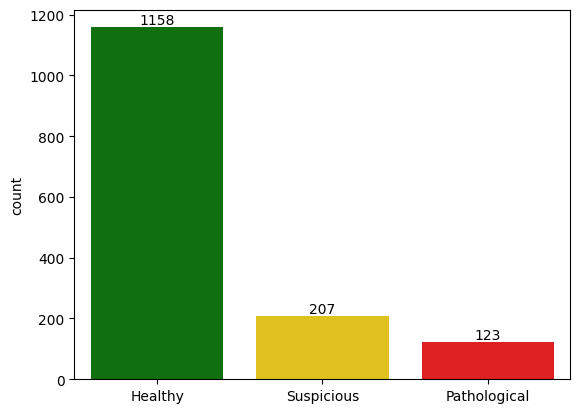

In [13]:
# YTrain.values[0]

colours=["green","gold", "red"]
plot = sb.countplot(x=YTrain.values,palette=colours)
plot.bar_label(plot.containers[0])
YTrain.value_counts()
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("trainset-before-smote")

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
x_sam,y_sam = smote.fit_resample(XDataTrain,YTrain)
XDataTrain,YTrain = smote.fit_resample(x_sam,y_sam)
YTrain.value_counts()

fetal_health
1.0    1158
2.0    1158
3.0    1158
Name: count, dtype: int64

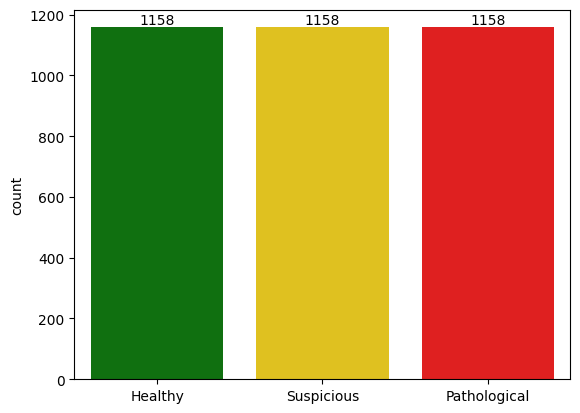

In [15]:
colours=["green","gold", "red"]
plot = sb.countplot(x=YTrain.values,palette=colours)
plot.bar_label(plot.containers[0])
YTrain.value_counts()
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("trainset-after-smote")

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#Training Linear Regression Classifier Model

LinearRegressionModel = Pipeline([('lr_classifier',LogisticRegression(random_state=25))])
LinearRegressionModel.fit(XDataTrain.values, YTrain.values)
filename = "./major/predict/LinearRegressionModel.sav"
joblib.dump(LinearRegressionModel,filename)
cv_score = cross_val_score(LinearRegressionModel, XDataTrain,YTrain, cv=12)
print(f"LinearRegression - {cv_score.mean()}")

LinearRegression - 0.8042665950761644


In [17]:
linear_pred = LinearRegressionModel.predict(XDataTest)
print(classification_report(YTest,linear_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.80      0.87       497
         2.0       0.40      0.64      0.49        88
         3.0       0.58      0.89      0.70        53

    accuracy                           0.79       638
   macro avg       0.65      0.78      0.69       638
weighted avg       0.85      0.79      0.81       638



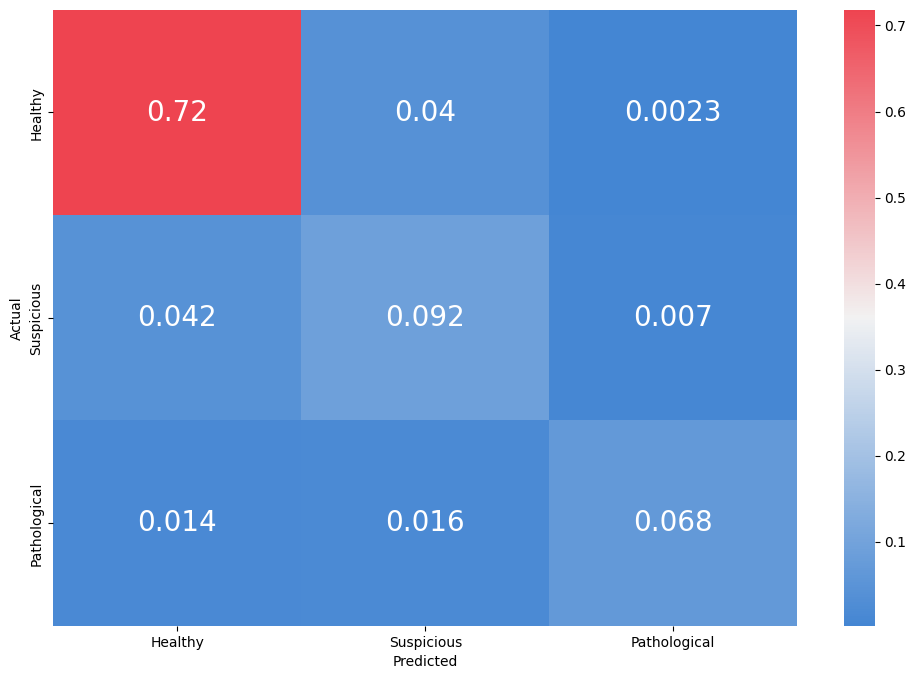

In [74]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, linear_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.gca().set_yticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("linear-cf-matrix.png")
plt.show()

In [19]:
DecisionTreeClassifierModel = Pipeline([('dt_classifier',DecisionTreeClassifier(random_state=25))])
DecisionTreeClassifierModel.fit(XDataTrain.values, YTrain)
filename = "./major/predict/DecisionTreeClassifierModel.sav"
joblib.dump(DecisionTreeClassifierModel,filename)
cv_score = cross_val_score(DecisionTreeClassifierModel, XDataTrain,YTrain, cv=12)
print(f"DecisionTreeClassifier - {cv_score.mean()}")

DecisionTreeClassifier - 0.9568349043471343


In [20]:
decisionTree_pred = DecisionTreeClassifierModel.predict(XDataTest)
print(classification_report(YTest,decisionTree_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       497
         2.0       0.71      0.73      0.72        88
         3.0       0.82      0.96      0.89        53

    accuracy                           0.91       638
   macro avg       0.83      0.88      0.85       638
weighted avg       0.91      0.91      0.91       638



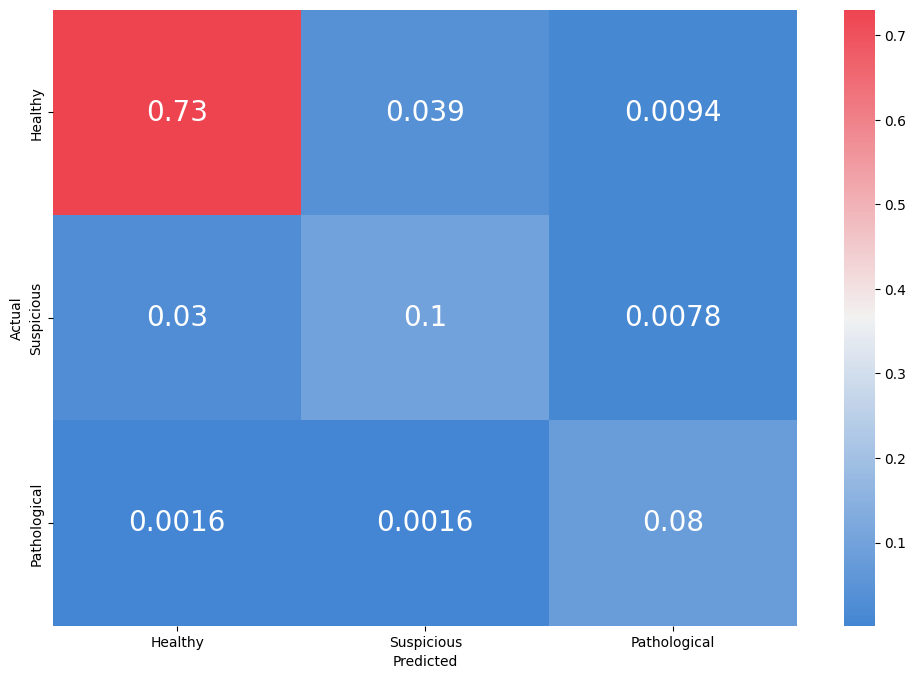

<Figure size 640x480 with 0 Axes>

In [21]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, decisionTree_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.gca().set_yticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("dt-cf-matrix")
plt.show()

In [22]:
RandomForestClassifierModel = Pipeline([('rf_classifier',RandomForestClassifier())])
RandomForestClassifierModel.fit(XDataTrain, YTrain)
filename = "./major/predict/RandomForestClassifierModel.sav"
joblib.dump(RandomForestClassifierModel,filename)
cv_score = cross_val_score(RandomForestClassifierModel, XDataTrain,YTrain, cv=12)
print(f"RandomForestClassifier - {cv_score.mean()}")

RandomForestClassifier - 0.9778407509048241


In [23]:
randomForest_pred = RandomForestClassifierModel.predict(XDataTest)
print(classification_report(YTest,randomForest_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       497
         2.0       0.80      0.75      0.77        88
         3.0       0.86      0.94      0.90        53

    accuracy                           0.93       638
   macro avg       0.87      0.89      0.88       638
weighted avg       0.93      0.93      0.93       638



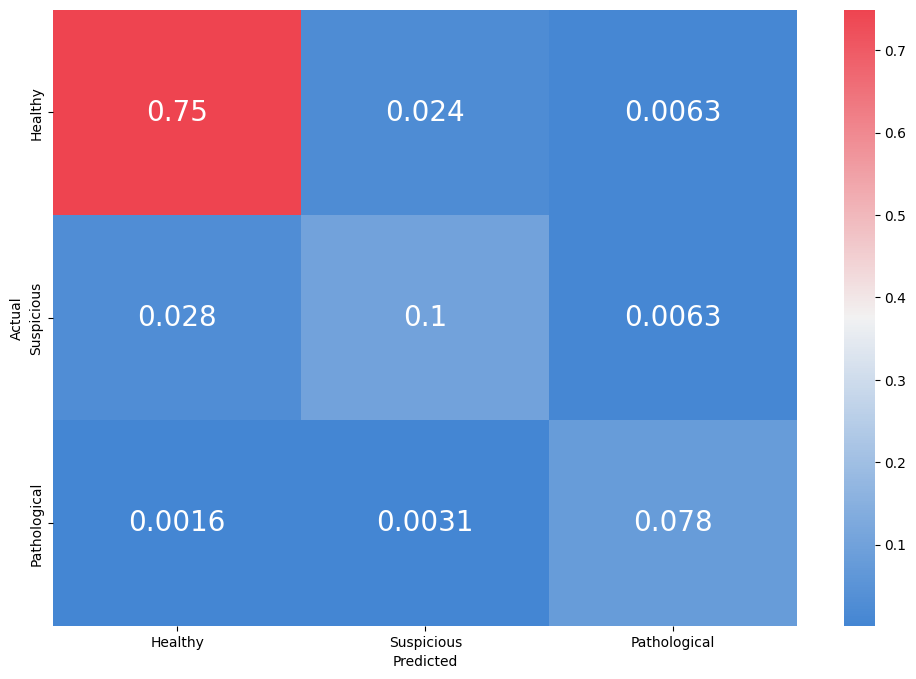

<Figure size 640x480 with 0 Axes>

In [24]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, randomForest_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.gca().set_yticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("rf-cf-matrix.svg")
plt.show()

In [25]:
SVCModel = Pipeline([('sv_classifier',SVC())])
SVCModel.fit(XDataTrain, YTrain)
filename = "./major/predict/SVCModel.sav"
joblib.dump(SVCModel,filename)
cv_score = cross_val_score(SVCModel, XDataTrain,YTrain, cv=12)
print(f"SVC - {cv_score.mean()}")

SVC - 0.8344927017460128


In [26]:
svc_pred = SVCModel.predict(XDataTest)
print(classification_report(YTest,svc_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.83      0.90       497
         2.0       0.48      0.73      0.58        88
         3.0       0.61      0.89      0.72        53

    accuracy                           0.82       638
   macro avg       0.69      0.82      0.73       638
weighted avg       0.87      0.82      0.84       638



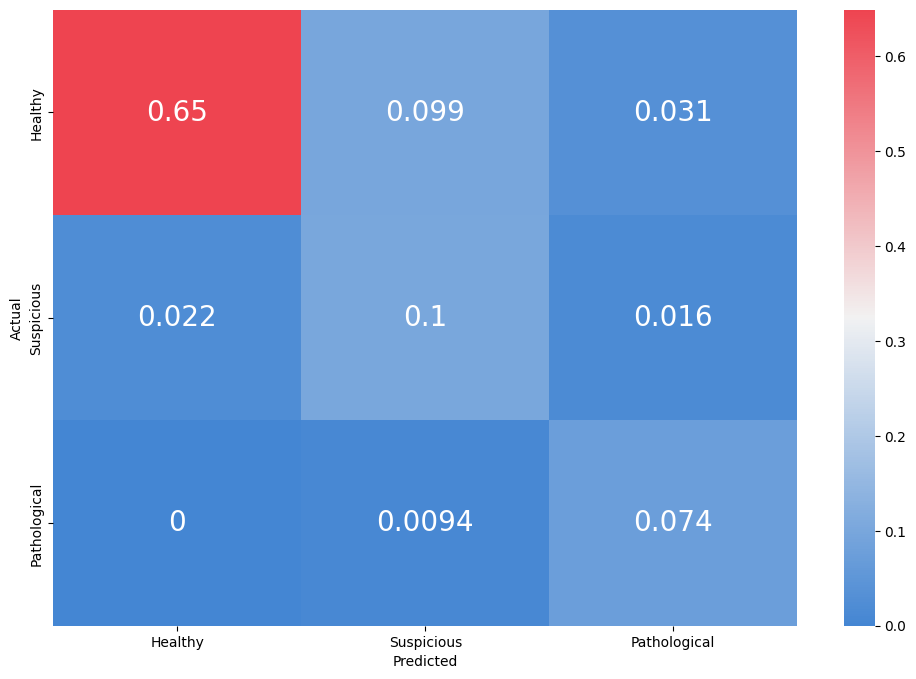

<Figure size 640x480 with 0 Axes>

In [27]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, svc_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.gca().set_yticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("svm-cf-matrix")
plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifierModel = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])
GradientBoostingClassifierModel.fit(XDataTrain, YTrain)
filename = "./major/predict/GradientBoostingClassifierModel.sav"
joblib.dump(GradientBoostingClassifierModel,filename)
cv_score = cross_val_score(GradientBoostingClassifierModel, XDataTrain,YTrain, cv=12)
print(f"GradientBoostingClassifierModel - {cv_score.mean()}")

GradientBoostingClassifierModel - 0.9689207731774251


In [29]:
gradient_pred = GradientBoostingClassifierModel.predict(XDataTest)
print(classification_report(YTest,gradient_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       497
         2.0       0.80      0.78      0.79        88
         3.0       0.91      0.94      0.93        53

    accuracy                           0.94       638
   macro avg       0.89      0.90      0.89       638
weighted avg       0.94      0.94      0.94       638



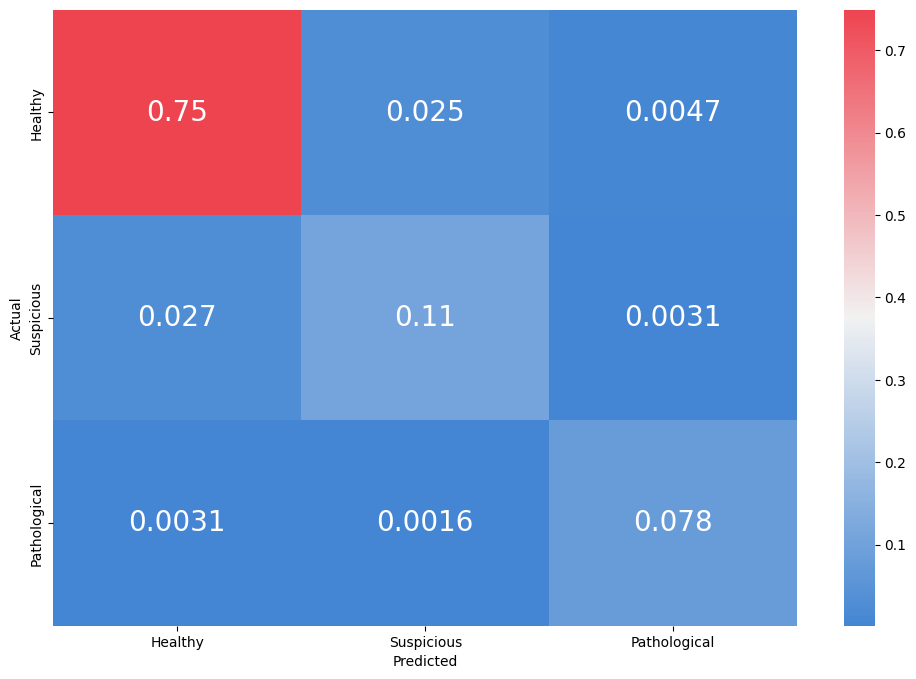

<Figure size 640x480 with 0 Axes>

In [30]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, gradient_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.gca().set_yticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("grad-cf-matrix")
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifierModel = Pipeline([('knn_classifier',KNeighborsClassifier())])
KNeighborsClassifierModel.fit(XDataTrain, YTrain)
filename = "./major/predict/KNeighborsClassifierModel.sav"
joblib.dump(KNeighborsClassifierModel,filename)
cv_score = cross_val_score(KNeighborsClassifierModel, XDataTrain,YTrain, cv=12)
print(f"KNeighborsClassifierModel - {cv_score.mean()}")

KNeighborsClassifierModel - 0.9450184942131011


In [32]:
knn_pred = KNeighborsClassifierModel.predict(XDataTest)
print(classification_report(YTest,knn_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.88      0.92       497
         2.0       0.55      0.78      0.64        88
         3.0       0.79      0.91      0.84        53

    accuracy                           0.87       638
   macro avg       0.77      0.86      0.80       638
weighted avg       0.89      0.87      0.88       638



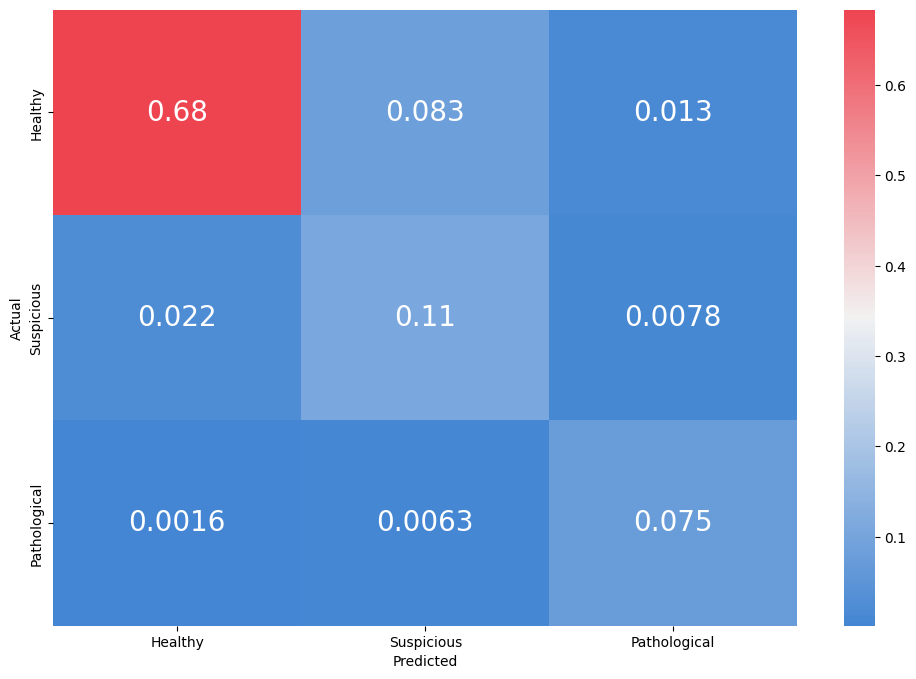

<Figure size 640x480 with 0 Axes>

In [33]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, knn_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gca().set_xticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.gca().set_yticklabels(['Healthy', 'Suspicious', 'Pathological'])
plt.savefig("knn-cf-matrix")
plt.show()

In [34]:
# to tune the model we are choosing the hyperparameter values 
# random forest hypertune
# parameters = { 
#     'n_estimators': [100,150, 200,500,700,900],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,6,8,12,14,16],
#     'criterion' :['gini', 'entropy'],
#     'n_jobs':[-1,1,None]
# }
# RandomForestClassifierModelHyperTuned = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
# RandomForestClassifierModelHyperTuned.fit(XDataTrain, YTrain)
# filename = "./major/predict/RandomForestClassifierModelHyperTuned.sav"
# joblib.dump(RandomForestClassifierModelHyperTuned,filename)
# PredGBCLModelTrain = RandomForestClassifierModelHyperTuned.predict(XDataTest)

# gradient boost hyperparams
# params = {"loss": ["deviance"],
#               "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
#               "n_estimators": [200, 350, 500, 750],
#               "max_depth": [3, 6, 8]
#               }
# params = {"loss": ["log_loss"],
#               "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
#               "n_estimators": [200, 350, 500, 750],
#               "max_depth": [3, 6, 8]
#               }

In [35]:
# RFCLModelTrain = RandomForestClassifierModelHyperTuned.score(XDataTrain,YTrain)
# RFCLModelTest = RandomForestClassifierModelHyperTuned.score(XDataTest,YTest)

# print(f"r^2(coeff of determination) on train set = {round(RFCLModelTrain, 3)}")
# print(f"r^2(coeff of determination) on test set = {round(RFCLModelTest, 3)}")

In [36]:
# GBCLModelTrain = GradientBoostingClassifierModel.score(XDataTrain,YTrain)
# GBCLModelTest = GradientBoostingClassifierModel.score(XDataTest,YTest)
# cv_score = cross_val_score(GradientBoostingClassifierModel, XDataTrain,YTrain, cv=12)
# print(f"GradientBoostingClassifierModel - {cv_score.mean()}")

# print(f"r^2(coeff of determination) on train set = {round(GBCLModelTrain, 3)}")
# print(f"r^2(coeff of determination) on test set = {round(GBCLModelTest, 3)}")

In [37]:
# RandomForestClassifierModelHyperTuned
# best_params = RandomForestClassifierModelHyperTuned.best_params_ # {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 100, 'n_jobs': None}
# print(best_params)

# RF_model = RandomForestClassifier(**RandomForestClassifierModelHyperTuned.best_params_)
RF_model = RandomForestClassifier(n_estimators= 100,criterion='entropy', max_depth=14, max_features= 'auto',  n_jobs=None)
RF_model.fit(XDataTrain, YTrain)

cv_score = cross_val_score(RF_model, XDataTrain,YTrain, cv=12)
print(f"RandomForestClassifierModelHyperTuned - {cv_score.mean()}")
RFCLModelTrain = RF_model.score(XDataTrain,YTrain)
RFCLModelTest = RF_model.score(XDataTest,YTest)
filename = "./major/predict/RandomForestClassifierModelHyperTuned.sav"
joblib.dump(RF_model,filename)

print(f"r^2(coeff of determination) on train set = {round(RFCLModelTrain, 3)}")
print(f"r^2(coeff of determination) on test set = {round(RFCLModelTest, 3)}")

RandomForestClassifierModelHyperTuned - 0.9787048084954062
r^2(coeff of determination) on train set = 1.0
r^2(coeff of determination) on test set = 0.937


In [38]:
# pred_gbcl = GradientBoostingClassifierModel.predict(XDataTest)
# acc = accuracy_score(YTest,pred_gbcl)
# print(f" Testing Score of the model is {acc}")

In [39]:
pred_RFHT = RF_model.predict(XDataTest)
acc = accuracy_score(YTest,pred_RFHT)
print(f" Testing Score of the model is {acc}")

 Testing Score of the model is 0.9373040752351097


In [40]:
print(classification_report(YTest, pred_RFHT))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       497
         2.0       0.80      0.80      0.80        88
         3.0       0.91      0.96      0.94        53

    accuracy                           0.94       638
   macro avg       0.89      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638



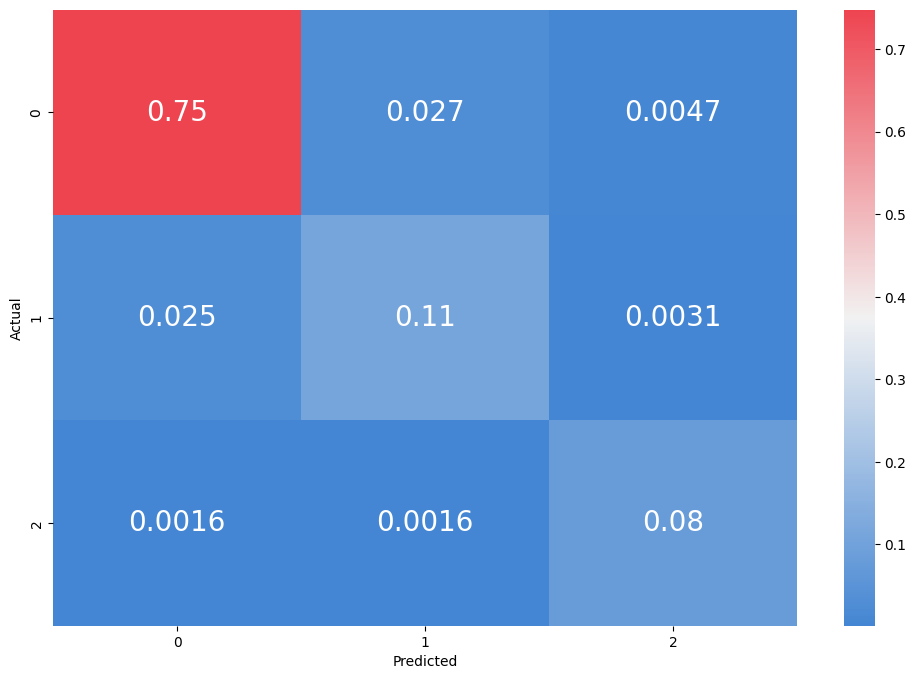

In [41]:
import seaborn as sns
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(YTest, pred_RFHT)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True),annot = True, annot_kws = {'size':20})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("rf-hyptertuned-cf-matrix.png")
plt.show()